<a href="https://colab.research.google.com/github/KwonSooJee/NBA_player-Position_And_Retirement-/blob/main/NBAplayer(P_R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PPT/player_data.csv')
seasons_df=pd.read_csv('/content/drive/MyDrive/PPT/seasons_stats.csv', encoding='latin-1')

pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      4979 non-null   object 
 1   From        4979 non-null   int64  
 2   To          4979 non-null   int64  
 3   Pos         4979 non-null   object 
 4   Ht          4979 non-null   object 
 5   Wt          4974 non-null   float64
 6   Birth Date  4961 non-null   object 
 7   Colleges    4628 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 311.3+ KB


In [ ]:
df['Birth Date'] = df['Birth Date'].str.slice(-4)
df['Birth Date'] = pd.to_numeric(df['Birth Date'], errors='coerce')
df = df.dropna(subset=['Birth Date'])
df['Birth Date'] = df['Birth Date'].astype(int)

<ipython-input-5-d462e7d040b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Birth Date'] = df['Birth Date'].astype(int)


In [ ]:
df['Period'] = df['To'] - df['From']
df['retire'] = df['To'] - df['Birth Date']
cols=['Player','Period','Pos', 'retire']
player_df=df[cols]
player_df.head()

,Player,Period,Pos,retire
0,Alaa Abdelnaby,4,F-C,27
1,Zaid Abdul-Aziz,9,C-F,32
2,Kareem Abdul-Jabbar*,19,C,42
3,Mahmoud Abdul-Rauf,10,G,32
4,Tariq Abdul-Wahad,5,F,29


In [ ]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4961 entries, 0 to 4978
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  4961 non-null   object
 1   Period  4961 non-null   int64 
 2   Pos     4961 non-null   object
 3   retire  4961 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 193.8+ KB


In [ ]:
seasons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28057 entries, 0 to 28056
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28057 non-null  int64  
 1   Year        28057 non-null  int64  
 2   Player      28057 non-null  object 
 3   Pos         28057 non-null  object 
 4   Age         28049 non-null  float64
 5   Tm          28057 non-null  object 
 6   G           28057 non-null  int64  
 7   GS          21666 non-null  float64
 8   MP          27571 non-null  float64
 9   FG          28057 non-null  int64  
 10  FGA         28057 non-null  int64  
 11  FG%         27942 non-null  float64
 12  3P          22360 non-null  float64
 13  3PA         22360 non-null  float64
 14  3P%         18632 non-null  float64
 15  2P          28057 non-null  int64  
 16  2PA         28057 non-null  int64  
 17  2P%         27878 non-null  float64
 18  eFG%        27942 non-null  float64
 19  FT          28057 non-nul

In [ ]:
seasons_clos=['Player', 'G', 'FGA', 'FTA','AST', 'PF','PTS']

seasons_df=seasons_df[seasons_clos]
seasons_df.head()

,Player,G,FGA,FTA,AST,PF,PTS
0,Curly Armstrong,63,516,241,176,217,458
1,Cliff Barker,49,274,106,109,99,279
2,Leo Barnhorst,67,499,129,140,192,438
3,Ed Bartels,15,86,34,20,29,63
4,Ed Bartels,13,82,31,20,27,59


In [ ]:
seasons_df=seasons_df.groupby('Player').sum()
seasons_df.head()

,G,FGA,FTA,AST,PF,PTS
Player,,,,,,
A.C. Green,1361,9686,4447,1469,2581,12928
A.J. Bramlett,8,21,0,0,13,8
A.J. English,151,1418,333,320,287,1502
A.J. Guyton,80,440,45,147,58,442
A.J. Hammons,22,42,20,4,21,48


In [ ]:
NBA_df = pd.merge(player_df, seasons_df, on='Player')
NBA_df.head()

,Player,Period,Pos,retire,G,FGA,FTA,AST,PF,PTS
0,Alaa Abdelnaby,4,F-C,27,385,1940,472,125,777,2299
1,Zaid Abdul-Aziz,9,C-F,32,570,4588,1536,648,1264,4978
2,Kareem Abdul-Jabbar*,19,C,42,1560,28307,9304,5660,4657,38387
3,Mahmoud Abdul-Rauf,10,G,32,586,7943,1161,2079,1106,8553
4,Tariq Abdul-Wahad,5,F,29,321,2519,755,388,688,2662


In [ ]:
def F(x):
  if 'F' in x:
    return 1
  else:
    return 0

def G(x):
  if 'G' in x:
    return 1
  else:
    return 0

def C(x):
  if 'C' in x:
    return 1
  else:
    return 0


NBA_df['F']=NBA_df['Pos'].apply(F)
NBA_df['Gu']=NBA_df['Pos'].apply(G)
NBA_df['C']=NBA_df['Pos'].apply(C)
NBA_df.head()

,Player,Period,Pos,retire,G,FGA,FTA,AST,PF,PTS,F,Gu,C
0,Alaa Abdelnaby,4,F-C,27,385,1940,472,125,777,2299,1,0,1
1,Zaid Abdul-Aziz,9,C-F,32,570,4588,1536,648,1264,4978,1,0,1
2,Kareem Abdul-Jabbar*,19,C,42,1560,28307,9304,5660,4657,38387,0,0,1
3,Mahmoud Abdul-Rauf,10,G,32,586,7943,1161,2079,1106,8553,0,1,0
4,Tariq Abdul-Wahad,5,F,29,321,2519,755,388,688,2662,1,0,0


In [ ]:
NBA_df.drop(['Pos'], axis=1, inplace=True)
NBA_df.head()

,Player,Period,retire,G,FGA,FTA,AST,PF,PTS,F,Gu,C
0,Alaa Abdelnaby,4,27,385,1940,472,125,777,2299,1,0,1
1,Zaid Abdul-Aziz,9,32,570,4588,1536,648,1264,4978,1,0,1
2,Kareem Abdul-Jabbar*,19,42,1560,28307,9304,5660,4657,38387,0,0,1
3,Mahmoud Abdul-Rauf,10,32,586,7943,1161,2079,1106,8553,0,1,0
4,Tariq Abdul-Wahad,5,29,321,2519,755,388,688,2662,1,0,0


In [ ]:
NBA_df['G/P'] = NBA_df['G'] / NBA_df['Period']
NBA_df.head()

,Player,Period,retire,G,FGA,FTA,AST,PF,PTS,F,Gu,C,G/P
0,Alaa Abdelnaby,4,27,385,1940,472,125,777,2299,1,0,1,96.250000
1,Zaid Abdul-Aziz,9,32,570,4588,1536,648,1264,4978,1,0,1,63.333333
2,Kareem Abdul-Jabbar*,19,42,1560,28307,9304,5660,4657,38387,0,0,1,82.105263
3,Mahmoud Abdul-Rauf,10,32,586,7943,1161,2079,1106,8553,0,1,0,58.600000
4,Tariq Abdul-Wahad,5,29,321,2519,755,388,688,2662,1,0,0,64.200000


In [ ]:
NBA_df['FGA/G'] = NBA_df['FGA'] / NBA_df['G']
NBA_df['FTA/G'] = NBA_df['FTA'] / NBA_df['G']
NBA_df['AST/G'] = NBA_df['AST'] / NBA_df['G']
NBA_df['PF/G'] = NBA_df['PF'] / NBA_df['G']
NBA_df['PTS/G'] = NBA_df['PTS'] / NBA_df['G']

# Now drop the original columns
NBA_df.drop(['FGA', 'FTA', 'AST', 'PF', 'PTS'], axis=1, inplace=True)

NBA_df.head()

,Player,Period,retire,G,F,Gu,C,G/P,FGA/G,FTA/G,AST/G,PF/G,PTS/G
0,Alaa Abdelnaby,4,27,385,1,0,1,96.250000,5.038961,1.225974,0.324675,2.018182,5.971429
1,Zaid Abdul-Aziz,9,32,570,1,0,1,63.333333,8.049123,2.694737,1.136842,2.217544,8.733333
2,Kareem Abdul-Jabbar*,19,42,1560,0,0,1,82.105263,18.145513,5.964103,3.628205,2.985256,24.607051
3,Mahmoud Abdul-Rauf,10,32,586,0,1,0,58.600000,13.554608,1.981229,3.547782,1.887372,14.595563
4,Tariq Abdul-Wahad,5,29,321,1,0,0,64.200000,7.847352,2.352025,1.208723,2.143302,8.292835


In [ ]:
NBA_df['Period'] = pd.to_numeric(NBA_df['Period'], errors='coerce')
NBA_df = NBA_df.dropna(subset=['Period'])
NBA_df['Period'] = NBA_df['Period'].astype(int)

In [ ]:
NBA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  4194 non-null   object 
 1   Period  4194 non-null   int64  
 2   retire  4194 non-null   int64  
 3   G       4194 non-null   int64  
 4   F       4194 non-null   int64  
 5   Gu      4194 non-null   int64  
 6   C       4194 non-null   int64  
 7   G/P     4194 non-null   float64
 8   FGA/G   4194 non-null   float64
 9   FTA/G   4194 non-null   float64
 10  AST/G   4194 non-null   float64
 11  PF/G    4194 non-null   float64
 12  PTS/G   4194 non-null   float64
dtypes: float64(6), int64(6), object(1)
memory usage: 426.1+ KB


In [ ]:
skew = NBA_df['Period'].skew()
kurt =NBA_df['Period'].kurtosis()
print('Period - Skewness: {0}, Kurtosis: {1}'.format(skew, kurt))

Period - Skewness: 0.8448547166448356, Kurtosis: -0.2453413500542747


<Axes: xlabel='Period'>

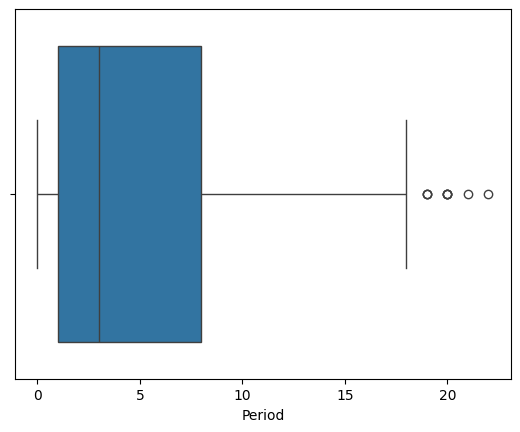

In [ ]:
import seaborn as sns
sns.boxplot(x = 'Period', data = NBA_df)

In [ ]:
Q1 = NBA_df['Period'].quantile(0.25)
Q3 = NBA_df['Period'].quantile(0.75)

IQR = Q3-Q1

Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR

print(Upper)
print(Lower)

18.5
-9.5


In [ ]:
c1 = NBA_df['Period'] <= Upper
c2 = NBA_df['Period'] > 0
NBA_df = NBA_df[c1&c2]
NBA_df.shape

(3246, 13)

In [ ]:
Q1 = NBA_df['G'].quantile(0.25)
Q3 = NBA_df['G'].quantile(0.75)

IQR = Q3-Q1

Upper = Q3 +1.5*IQR
Lower = Q1 - 1.5*IQR


print(Upper)
print(Lower)


1448.375
-702.625


In [ ]:
c1 = NBA_df['G'] <= Upper
c2 = NBA_df['G'] > 1
NBA_df = NBA_df[c1&c2]
NBA_df.shape

(3229, 13)

In [ ]:
Q1 = NBA_df['retire'].quantile(0.25)
Q3 = NBA_df['retire'].quantile(0.75)

IQR = Q3-Q1

Upper = Q3 +1.5*IQR
Lower = Q1 - 1.5*IQR


print(Upper)
print(Lower)

43.5
15.5


In [ ]:
c1 = NBA_df['retire'] <= Upper
c2 = NBA_df['retire'] >= Lower
NBA_df = NBA_df[c1&c2]
NBA_df.shape

(3229, 13)

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='C'>

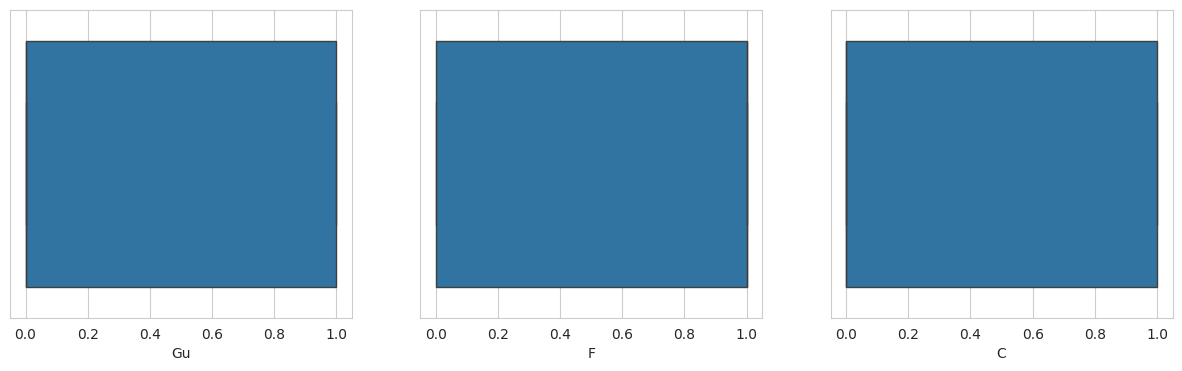

In [ ]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,3,figsize=(15,4))

sns.boxplot(ax=axes[0],x = 'Gu', data = NBA_df)
sns.boxplot(ax=axes[1],x = 'F', data = NBA_df)
sns.boxplot(ax=axes[2],x = 'C', data = NBA_df)

<Axes: >

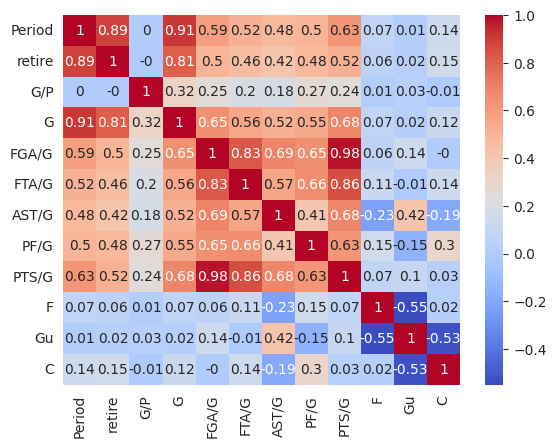

In [ ]:
cols3=  ['Period','retire','G/P','G','FGA/G','FTA/G','AST/G','PF/G','PTS/G','F','Gu','C'] # 구간 변수와 타깃변수를 cols에 저장

corr=NBA_df[cols3].corr().round(2)
sns.heatmap(corr, annot=True, cmap='coolwarm')

['Player','Period','G/P','FGA/G','FTA/G','AST/G','PF/G','PTS/G','F','Gu','C']

In [ ]:
from scipy import stats

In [ ]:
data_1=NBA_df[NBA_df['F']==1]['Period']
data_0=NBA_df[NBA_df['F']==0]['Period']

stats.ttest_ind(data_1,data_0)

TtestResult(statistic=3.342042392015646, pvalue=0.0008411164295426446, df=3227.0)

In [ ]:
data_1=NBA_df[(NBA_df['C']==1)]['Period']
data_0=NBA_df[(NBA_df['C']==0)]['Period']

stats.ttest_ind(data_1,data_0)

TtestResult(statistic=7.044631852184421, pvalue=2.2631315223632014e-12, df=3227.0)

In [ ]:
data_1=NBA_df[NBA_df['Gu']==1]['Period']
data_0=NBA_df[NBA_df['Gu']==0]['Period']

stats.ttest_ind(data_1,data_0)

TtestResult(statistic=-0.7635852888721695, pvalue=0.44517023993101246, df=3227.0)

<Axes: xlabel='Period', ylabel='Count'>

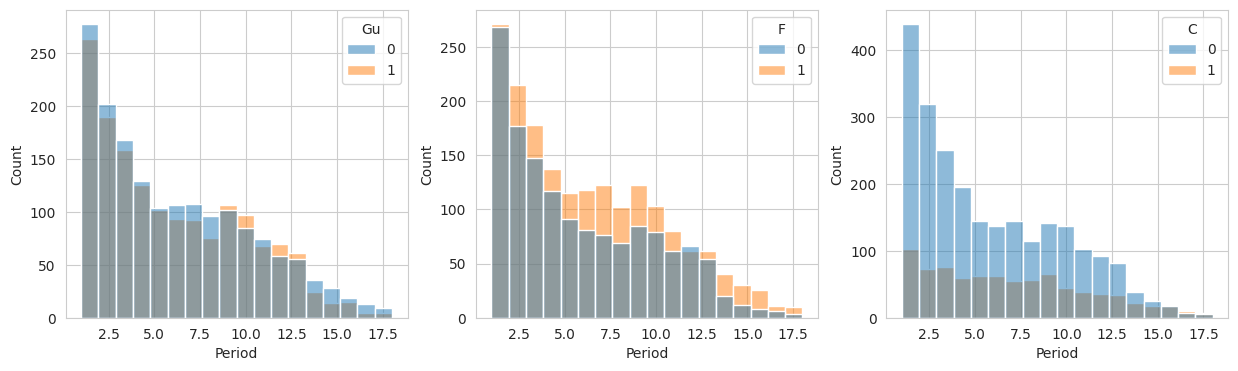

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

sns.histplot(ax=axes[0],x="Period", hue="Gu", data = NBA_df)
sns.histplot(ax=axes[1],x="Period", hue="F", data = NBA_df)
sns.histplot(ax=axes[2],x="Period", hue="C", data = NBA_df)

#sns.histplot(data=NBA_df, x="Period", hue="Gu", bins=20)

<Axes: xlabel='C', ylabel='Period'>

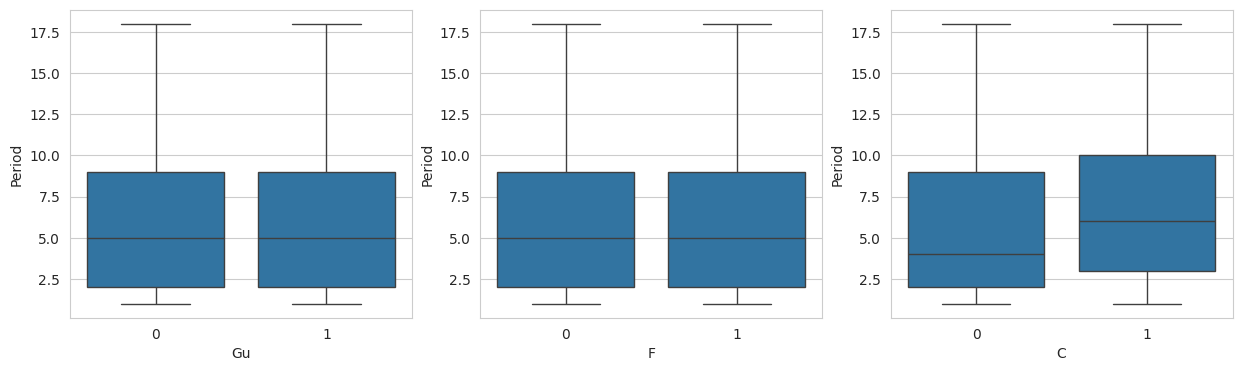

In [ ]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,3,figsize=(15,4))

sns.boxplot(ax=axes[0],x = 'Gu', y='Period',data = NBA_df)
sns.boxplot(ax=axes[1],x = 'F',y='Period', data = NBA_df)
sns.boxplot(ax=axes[2],x = 'C', y='Period',data = NBA_df)

#sns.boxplot(x='Gu',y='Period',data=NBA_df)

In [ ]:
data =NBA_df.drop(['Period', 'F','Gu','C'], axis=1)
target = NBA_df['Period']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.25, random_state=42,
    stratify=target)

y_test.shape


(808,)

In [ ]:
data_1=NBA_df[NBA_df['Gu']==1]
data_1.count()

Player    1561
Period    1561
retire    1561
G         1561
F         1561
Gu        1561
C         1561
G/P       1561
FGA/G     1561
FTA/G     1561
AST/G     1561
PF/G      1561
PTS/G     1561
dtype: int64

In [ ]:
NBA_df['retire'].median()

29.0

In [ ]:
NBA_df['Period'].median()

5.0